By [Piotr Migdał](http://p.migdal.pl/). Work in progress.

Data sources:

* [List of countries by suicide rate - Wikipedia](http://en.wikipedia.org/wiki/List_of_countries_by_suicide_rate)
* [List of countries by population (United Nations) - Wikipedia](https://en.wikipedia.org/wiki/List_of_countries_by_population_%28United_Nations%29): 1 July 2015 and 2016

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
country <- read.csv("data/country_suicide.csv")
head(country)

,Country,Both.sexes,Male.rank,Male,Female.rank,Female
1,Guyana,44.2,1,70.8,1,22.1
2,South Korea,28.9,5,41.7,5,18
3,Sri Lanka,28.8,3,46.4,7,12.8
4,Lithuania,28.2,2,51,29,8.4
5,Suriname,27.8,4,44.5,11,11.9
6,Mozambique,27.4,8,34.2,2,21.1


In [3]:
population <- read.csv("data/country_population.csv") %>%
  mutate(Pop.Growth.Percent=(Population.2016/Population.2015 - 1) * 100)
head(population)

,Country,Continent.UN,Region.UN,Population.2016,Population.2015,Pop.Growth.Percent
1,China,Asia,Eastern Asia,1382323332,1376048943,0.45597135421076
2,India,Asia,Southern Asia,1326801576,1311050527,1.20140670978122
3,United States,Americas,Northern America,324118787,321773631,0.728821685205139
4,Indonesia,Asia,South-Eastern Asia,260581100,257563815,1.17147084500204
5,Brazil,Americas,South America,209567920,207847528,0.827718287801815
6,Pakistan,Asia,Southern Asia,192826502,188924874,2.06517432955917


In [4]:
length(intersect(population$Country, country$Country))

[1] 169

In [5]:
length(country$Country)

[1] 171

In [6]:
length(population$Country)

[1] 233

In [7]:
suicides <- inner_join(country, population)
head(suicides)

Joining by: "Country"
Warning message in inner_join_impl(x, y, by$x, by$y):
“joining factors with different levels, coercing to character vector”

,Country,Both.sexes,Male.rank,Male,Female.rank,Female,Continent.UN,Region.UN,Population.2016,Population.2015,Pop.Growth.Percent
1,Guyana,44.2,1,70.8,1,22.1,Americas,South America,770610,767085,0.45953186413501
2,South Korea,28.9,5,41.7,5,18,Asia,Eastern Asia,50503933,50293439,0.418531729357374
3,Sri Lanka,28.8,3,46.4,7,12.8,Asia,Southern Asia,20810816,20715010,0.462495552741715
4,Lithuania,28.2,2,51,29,8.4,Europe,Northern Europe,2850030,2878405,-0.985789004674464
5,Suriname,27.8,4,44.5,11,11.9,Americas,South America,547610,542975,0.853630461807642
6,Mozambique,27.4,8,34.2,2,21.1,Africa,Eastern Africa,28751362,27977863,2.76468220607129


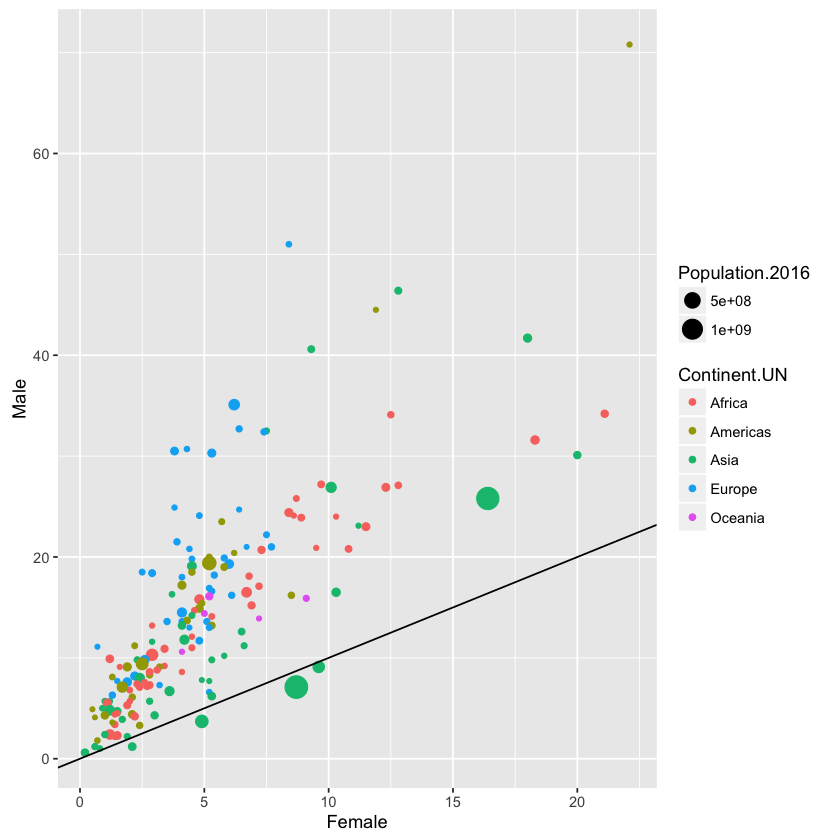

In [8]:
ggplot(suicides, aes(Female, Male, label=Country, color=Continent.UN, size=Population.2016)) +
  geom_point() +
  geom_abline(slope=1, intercept=0)

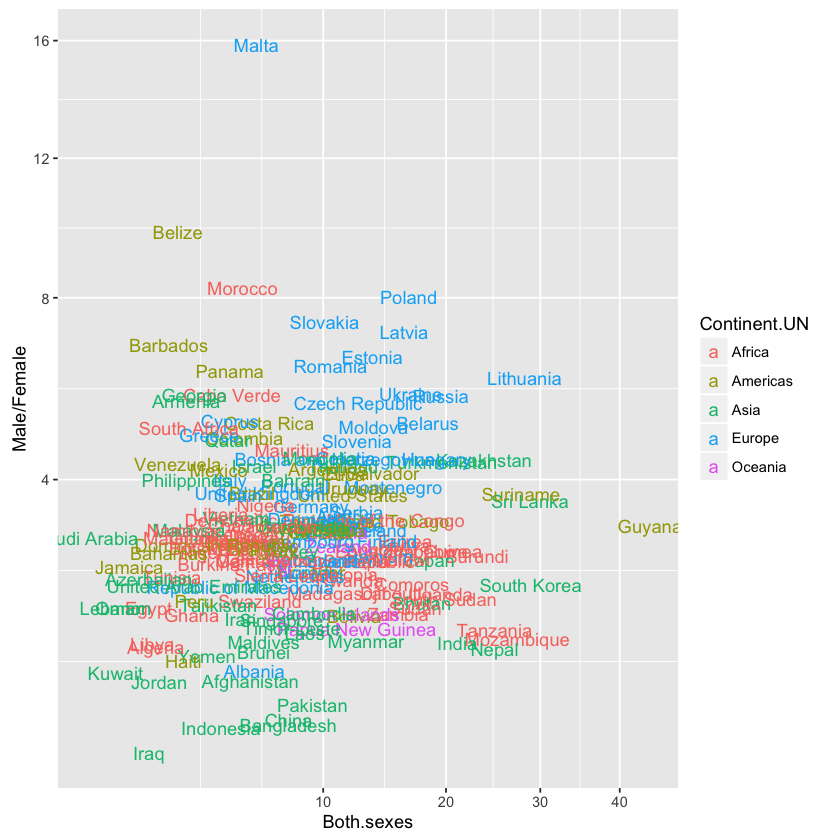

In [9]:
ggplot(suicides, aes(Both.sexes, Male/Female, label=Country, color=Continent.UN)) +
  geom_text() +
  scale_x_sqrt() +
  scale_y_sqrt()

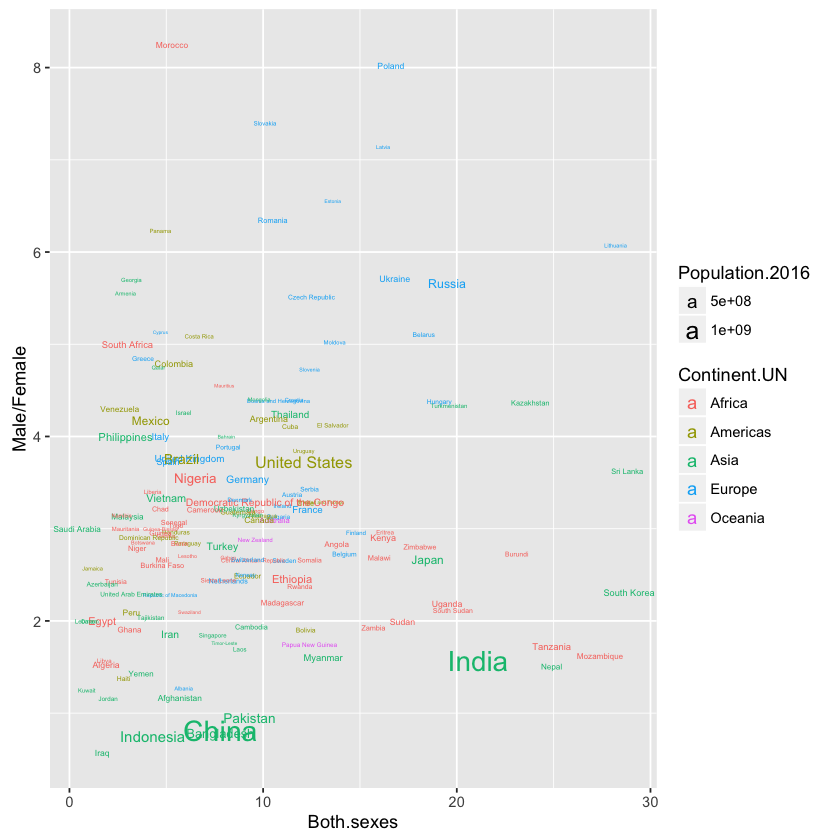

In [10]:
suicides_some <- suicides %>% filter(Population.2016 > 1e6)
ggplot(suicides_some, aes(Both.sexes, Male/Female, label=Country, color=Continent.UN, size=Population.2016)) +
  geom_text()

In [11]:
library("scales")

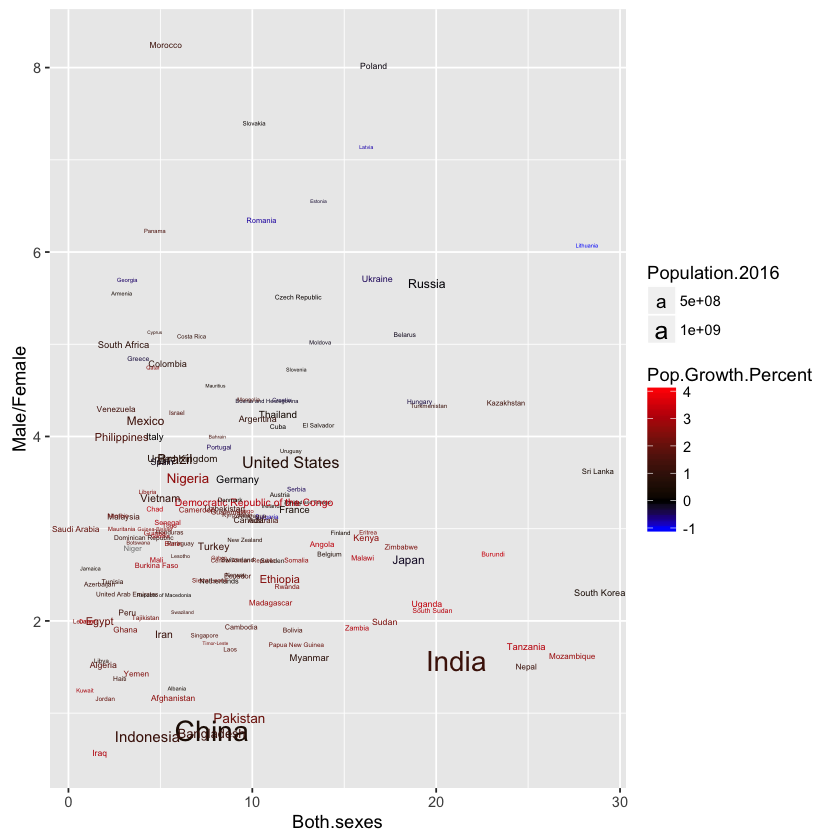

In [12]:
suicides_some <- suicides %>% filter(Population.2016 > 1e6)
ggplot(suicides_some, aes(Both.sexes, Male/Female, label=Country, color=Pop.Growth.Percent, size=Population.2016)) +
  geom_text() +
  scale_color_gradientn(colours = c("blue","black","red"), 
                        values = rescale(c(-1,0,4)),
                         guide = "colorbar", limits=c(-1,4))

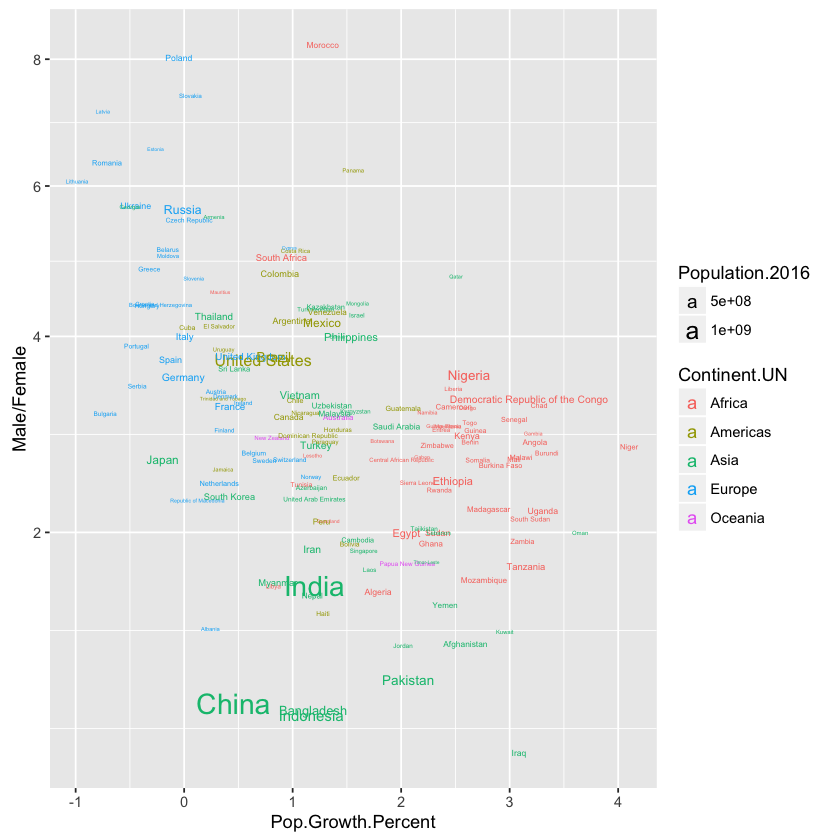

In [13]:
suicides_some <- suicides %>% filter(Population.2016 > 1e6)
ggplot(suicides_some, aes(Pop.Growth.Percent, Male/Female, label=Country, color=Continent.UN, size=Population.2016)) +
  geom_text() +
  scale_y_sqrt()

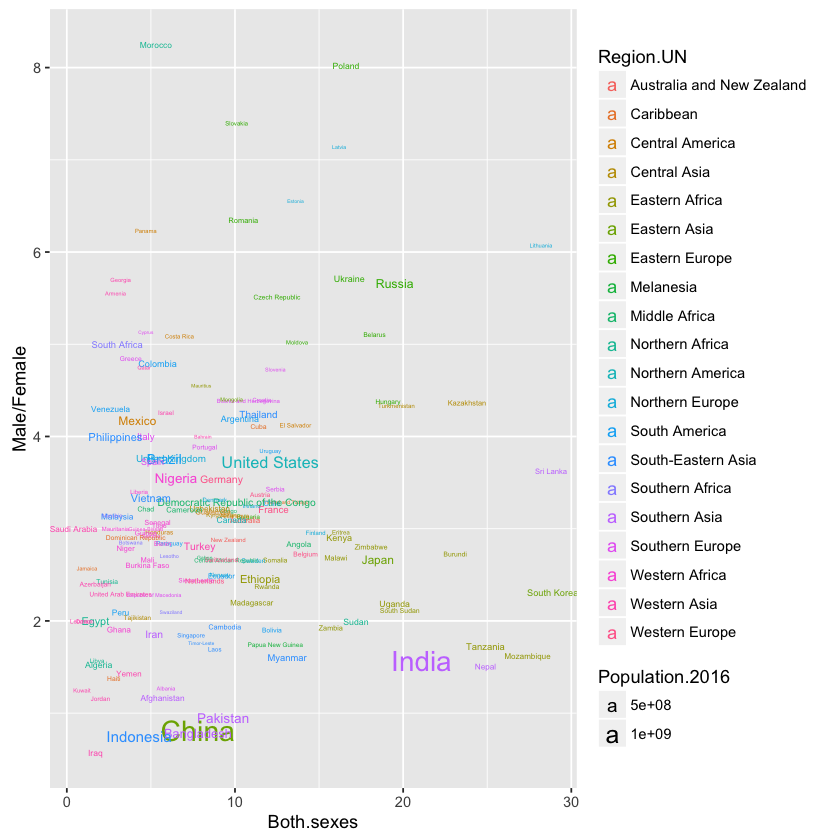

In [14]:
suicides_some <- suicides %>% filter(Population.2016 > 1e6)
ggplot(suicides_some, aes(Both.sexes, Male/Female, label=Country, color=Region.UN, size=Population.2016)) +
  geom_text()